(80, 2)


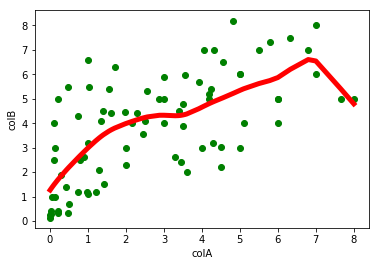

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
#the Gaussian Kernel
def kernel(point,xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights
 
#Weigh each point by its distance to the reference point. We are considering
# All points here. If KNN was the topic, we could restrict this to "K"
def localWeight(point,xmat,ymat,k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W
     
def localWeightRegression(xmat,ymat,k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        # predicted value y = wx. Here w = weights we have computed.
        # Remember that both w and x are vectors here (2*1 and 1*2 respectively)
        # Resultant value of y is a scalar
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred
     
    
# load data points
data = pd.read_csv('LR.csv')
colA = np.array(data.colA)
colB = np.array(data.colB)
 
#preparing and add 1
#convert to matrix form
mcolA = np.mat(colA)
mcolB = np.mat(colB)
m= np.shape(mcolA)[1]
one = np.ones((1,m),dtype=int)

#horizontally stack
X= np.hstack((one.T,mcolA.T))
print(X.shape)

#set k here (0.5)
ypred = localWeightRegression(X,mcolB,0.5)
SortIndex = X[:,1].argsort(0)
xsort = X[SortIndex][:,0]
     
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(colA,colB, color='green')
ax.plot(xsort[:,1],ypred[SortIndex], color = 'red', linewidth=5)
plt.xlabel('colA')
plt.ylabel('colB')
plt.show();